In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

     
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an
import _ressources.network as net

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/eps'
#main_dir = '/Volumes/LaCie/chain_lumen/_data/osmotic/'

try :
    os.path.isdir(main_dir)
except :
    print('main_dir not found !')

In [27]:
ell0 = 10.
L0 = 1.
tauv = 1.
mu = 0.6105653703843762

In [42]:
nsim = 20
eps_dict = {'1e-4' : ('#E74C3C', 'o'), 
            '1e-3' : ('#9B59B6', 's'), 
            '1e-2' : ('#2980B9', 'x'), 
            '1e-1' : ('#1ABC9C', '+'), 
            '1e0'  : ('#2ECC71', '<'), 
            '1e1'  : ('#F1C40F', 'd'), 
            '1e2'  : ('#E67E22', 'h')}
chi_dict = {(500, 5) : ('o'), (50, 5) : ('s')}

In [4]:
Ndict = {}

for chi in chi_dict.keys() :
    chiv, chis = chi[0], chi[1]
    Ndict[chi] = {}
    subdir = 'chiv'+str(chiv)+'_chis'+str(chis)
    print('=============================')
    print('chiv = '+ str(chiv) + ' ; chis = ' +str(chis))
    
    for eps in eps_dict.keys() :
        try :
            Ndict[chi][eps] = {}
            subsubdir = 'eps'+str(eps)
            print('\teps = ' + str(eps) + ' importing...')
            for n in range(nsim) :
                Ndict[chi][eps][n] = np.loadtxt(os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4), 'sim_nlum.dat'))
            print('\teps  =', eps, ' done !\n')
        except :
            pass
    
        

chiv = 500 ; chis = 5
	eps = 1e-4 importing...
	eps  = 1e-4  done !

	eps = 1e-3 importing...
	eps  = 1e-3  done !

	eps = 1e-2 importing...
	eps  = 1e-2  done !

	eps = 1e-1 importing...
	eps  = 1e-1  done !

	eps = 1e0 importing...
	eps  = 1e0  done !

	eps = 1e1 importing...
	eps  = 1e1  done !

	eps = 1e2 importing...
	eps  = 1e2  done !

chiv = 50 ; chis = 5
	eps = 1e-4 importing...
	eps  = 1e-4  done !

	eps = 1e-3 importing...
	eps  = 1e-3  done !

	eps = 1e-2 importing...
	eps  = 1e-2  done !

	eps = 1e-1 importing...
	eps  = 1e-1  done !

	eps = 1e0 importing...
	eps  = 1e0  done !

	eps = 1e1 importing...
	eps = 1e2 importing...


In [9]:
Nt_avg, Nt_std = {}, {}
npts = 50

for chi in chi_dict.keys() :
    Nt_avg[chi] = {}
    Nt_std[chi] = {}
    for eps in eps_dict.keys() :
        try :
            Nt_avg[chi][eps], Nt_std[chi][eps] = {}, {}
            subdir = 'eps'+str(eps)
            wmin = int(np.log10(np.min([Ndict[chi][eps][i][1, 0] for i in range(nsim)])))
            wmax = int(np.log10(np.max([Ndict[chi][eps][i][-1, 0] for i in range(nsim)])))+1
            Nt_avg[chi][eps], Nt_std[chi][eps] = an.batch(data_dict=Ndict[chi][eps], wmin=wmin, wmax=wmax, nwindow=npts)
        except :
            pass
        
        

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !
End of import !
End of import !
End of import !
End of import !
End of import !
End of import !
End of import !
End of import !
End of import !
End of import !


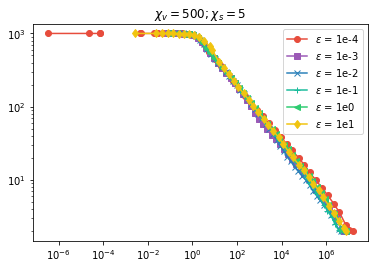

In [37]:
plt.xscale('log')
plt.yscale('log')

chi = (500, 5)
xiv = chi[0]*ell0
for eps in eps_dict.keys() :
    try :
        if eps != '1e2' :
            Th = 2*tauv*L0**2 / (mu*float(eps)*xiv**2)
            plt.plot(Nt_avg[chi][eps][:, 0]/Th, Nt_avg[chi][eps][:, 1], label = r'$\epsilon$ = ' + str(eps), marker=eps_dict[eps][1], color = eps_dict[eps][0])
    except : pass
    
plt.title(r'$\chi_v = $' +str(chi[0])+r'$ ; \chi_s = $' +str(chi[1]))
plt.legend()
plt.show()

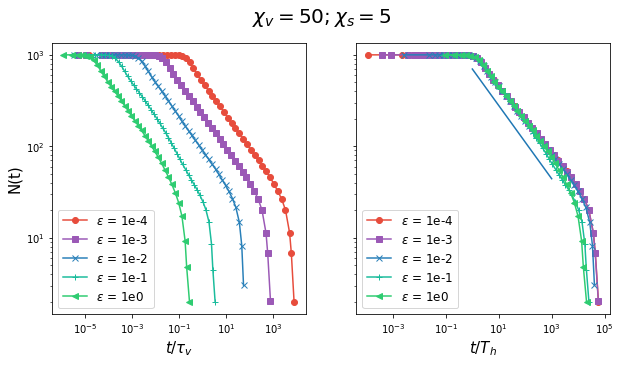

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].set_xscale('log')
ax[1].set_yscale('log')

chi = (50, 5)
xiv = chi[0]*ell0
for eps in eps_dict :
    #if 1 :
    try :
        Th = 2*tauv*L0**2 / (mu*float(eps)*xiv**2)
        ax[0].plot(Nt_avg[chi][eps][:, 0], Nt_avg[chi][eps][:, 1], label = r'$\epsilon$ = ' + str(eps), marker=eps_dict[eps][1], color = eps_dict[eps][0])
        ax[1].plot(Nt_avg[chi][eps][:, 0]/Th, Nt_avg[chi][eps][:, 1], label = r'$\epsilon$ = ' + str(eps), marker=eps_dict[eps][1], color = eps_dict[eps][0])
            
    #else : None
    except : pass
    
k, alpha = 700, -2/5
t = np.logspace(0, 3)
ax[1].plot(t, k*t**alpha)
    
plt.suptitle(r'$\chi_v = $' +str(chi[0])+r'$ ; \chi_s = $' +str(chi[1]), fontsize=20)
ax[0].set_xlabel(r'$t/\tau_v$', fontsize=15)
ax[1].set_xlabel(r'$t/T_h$', fontsize=15)
ax[0].set_ylabel('N(t)', fontsize=15)
ax[0].legend(loc=3, fontsize=12)
ax[1].legend(loc=3, fontsize=12)
#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/chain_epsilon_chiv50_chis5.eps', format='eps')
plt.show()

In [43]:
plt.xscale('log')
plt.yscale('log')

chi = (50, 5)
xiv = chi[0]*ell0
for eps in eps_dict.keys() :
    try :
        if 1 :
            Th = 2*tauv*L0**2 / (mu*float(eps)*xiv**2)
            plt.plot(Nt_avg[chi][eps][:, 0]/Th, Nt_avg[chi][eps][:, 1], label = r'$\epsilon$ = ' + str(eps), marker=chi_dict[chi][0], color = eps_dict[eps])
    except : pass
    
plt.title(r'$\chi_v = $' +str(chi[0])+r'$ ; \chi_s = $' +str(chi[1]))

plt.legend()
plt.grid()
#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/chain_epsilon_chiv50_chis5.eps', format='eps')
plt.show()


ValueError: RGBA sequence should have length 3 or 4

<Figure size 432x288 with 1 Axes>